In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
url = 'http://polygons.openstreetmap.fr/get_geojson.py?id=12893646&params=0'
data = gpd.read_file(url)

In [113]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
data.centroid

<ipython-input-112-df9ba546a072>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.centroid


0    POINT (-74.18041 4.31440)
dtype: geometry

## Opcion 2 para leer Geojson

In [94]:
import requests
import shapely
from shapely.geometry import shape, Point, Polygon

In [8]:
response = requests.get(url)

In [36]:
geo_dict = response.json()

In [56]:
points = geo_dict['geometries'][0]['coordinates'][0][0]

In [73]:
df = pd.DataFrame(
    {
        'ID': ["p"+str(i) for i in range(len(points))],
        'Latitud': [p[0] for p in points],
        'Longitud': [p[1] for p in points]
    })

In [114]:
# Creacion de geodataframe a partir de columnas con coordenadas x,y
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Latitud, df.Longitud))
gdf = gdf.set_crs('epsg:4326')
gdf.head()

,ID,Latitud,Longitud,geometry
0,p0,-74.441472,3.728441,POINT (-74.44147 3.72844)
1,p1,-74.439066,3.728106,POINT (-74.43907 3.72811)
2,p2,-74.438510,3.729047,POINT (-74.43851 3.72905)
3,p3,-74.438205,3.729815,POINT (-74.43820 3.72982)
4,p4,-74.437568,3.731054,POINT (-74.43757 3.73105)


In [104]:
# Creando objeto poligono
bogotaPolygon = Polygon(points)

In [115]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Lectura de mapa

**Con geopandas**

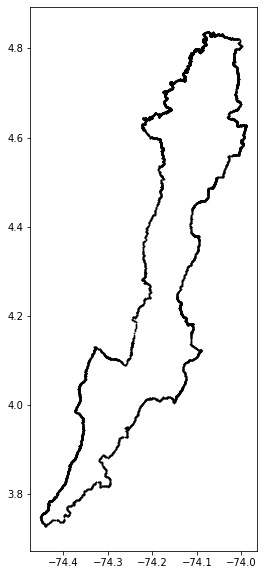

In [107]:
ax = gdf.plot(color='green', edgecolor='black',figsize=(5,10), markersize=0.5)
#gdf.plot(ax=ax, )

plt.show()

**Con geoplot**

In [4]:
import geoplot
import geoplot.crs as gcrs

In [67]:
#geoplot.polyplot(data, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
#    figsize=(12, 8))